## Baseline models

In [1]:
import dataloader
import DataDLC
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import importlib
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2

In [2]:
importlib.reload(dataloader)
importlib.reload(DataDLC)

<module 'DataDLC' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\DataDLC.py'>

**Load DMD_null male dataset**

# Testing on external Data

DMD femalle

In [3]:
# Deactivate warnings
import warnings
warnings.filterwarnings('ignore')

data_loader = dataloader.DLCDataLoader(r'c:\Users\jalvarez\Documents\Data\DataSet_MDX52_INES', build_graph=False)

['Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_2DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_3DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_4DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_6DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'Test_7DLC_dlcrnetms5_More_BodyPartsJul9shu

In [4]:
# Build a 3x6 matrix
# 3 rows, 6 columns
matrix = np.random.randint(0, 10, (3, 6))
print(matrix)

[[0 4 9 3 2 3]
 [9 8 6 8 1 8]
 [6 7 2 8 9 1]]


In [5]:
second_part = matrix[:, matrix.shape[1]//2:].copy()
print(second_part)

[[3 2 3]
 [8 1 8]
 [8 9 1]]


In [6]:
matrix[:, matrix.shape[1]//2:] =  matrix[:, :matrix.shape[1]//2]
print(matrix)

[[0 4 9 0 4 9]
 [9 8 6 9 8 6]
 [6 7 2 6 7 2]]


In [7]:
matrix[:, :matrix.shape[1]//2] = second_part
print(matrix)

[[3 2 3 0 4 9]
 [8 1 8 9 8 6]
 [8 9 1 6 7 2]]


In [8]:
dataset = data_loader.data_list

In [9]:
dataset[0][0].shape

(5406, 108)

In [10]:
# behaviour names
beh_names = dataset[0][1].columns
beh_names

Index(['Frame', 'General_Contacts', 'Sniffing_R', 'Sniffing_head_R',
       'Sniffing_body_R', 'Sniffing_anogenital_R', 'Following_R',
       'Dominance_R', 'Rearing_R', 'Grooming_R', 'Sniffing_V',
       'Sniffing_head_V', 'Sniffing_body_V', 'Sniffing_anogenital_V',
       'Rearing_V', 'Grooming_V', 'Following_V', 'Dominance_V'],
      dtype='object')

In [12]:
coords_R = []
coords_V = []
behaviour = []

for i in tqdm.tqdm(range(len(dataset))):

    ### Prepare a dataset wich is simply all the points concatenated
    n_frames, n_features_coords = dataset[i][0].shape
    coords = dataset[i][0]
    if coords.shape[0] != dataset[i][1].shape[0]:
        print("Warrning: ", i, " ", coords.shape[0], " ", dataset[i][1].shape[0])
    coords_R.append(coords.copy())

    coords_ind1 = coords[:, n_features_coords//2:].copy()
    coords[:, n_features_coords//2:] = coords[:, :n_features_coords//2]
    coords[:, :n_features_coords//2] = coords_ind1

    coords_V.append(coords.copy())

    behaviour.append(dataset[i][1].to_numpy())

100%|██████████| 16/16 [00:00<00:00, 82.10it/s]


In [13]:
y = np.concatenate(behaviour)
X_R = np.concatenate(coords_R)
X_V = np.concatenate(coords_V)

In [14]:
y.shape[0]
np.sum(y[:, 0]/y.shape[0])

2703.1875910215217

In [15]:
# Print each class balance
print("Class balance")
for i, name in enumerate(beh_names[1:]):

    print(name, ": ", np.sum(y[:, i+1]))


Class balance
General_Contacts :  50613.0
Sniffing_R :  50115.0
Sniffing_head_R :  6059.0
Sniffing_body_R :  6335.0
Sniffing_anogenital_R :  23934.0
Following_R :  1633.0
Dominance_R :  2759.0
Rearing_R :  2943.0
Grooming_R :  143.0
Sniffing_V :  2751.0
Sniffing_head_V :  1102.0
Sniffing_body_V :  220.0
Sniffing_anogenital_V :  96.0
Rearing_V :  9678.0
Grooming_V :  1122.0
Following_V :  0.0
Dominance_V :  617.0


In [16]:
print(X_R.shape)
print(X_V.shape)
print(y.shape)

(86518, 108)
(86518, 108)
(86518, 18)


In [20]:
print( ' after clipping: ', X_R[:, 0::3].max(), X_R[:, 0::3].min())
print( ' after clipping: ', X_R[:, 1::3].max(), X_R[:, 1::3].min())

 after clipping:  0.9880203125 0.0
 after clipping:  0.9828583333333333 0.0


In [17]:
# vido path
video_path = r'c:\Users\jalvarez\Documents\Data\videos\mp4videos\MDX52_INES\Test_1.mp4'

cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
cap.release()

print(frame_width, frame_height, frame_count, fps)

640 480 5407 30


In [18]:
beh_names[0]

'General_Contacts'

## General contact

In [17]:
# Load the model
model = joblib.load('baseline_models/new_dataset/model_gencont.pkl')
print(model)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)


In [18]:
y[:, 0]

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 5.406e+03, 5.407e+03,
       5.408e+03])

In [19]:
# Test the model
y_pred = model.predict(X_R)

accuracy_score(y[:, 1], y_pred)

0.798932014147345

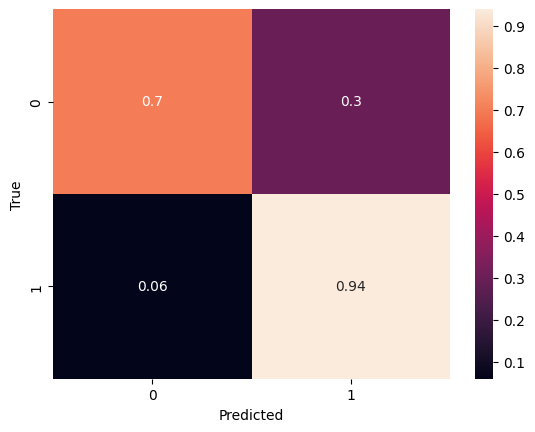

In [180]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 1], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


___

In [21]:
beh_names[2]

'Sniffing_R'

In [22]:
# Load the model
model = joblib.load('baseline_models/new_dataset/model_sniffR.pkl')
print(model)


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)


In [23]:
# tEST THE MODEL
y_pred = model.predict(X_R)

accuracy_score(y[:, 2], y_pred)

0.8020874268938256

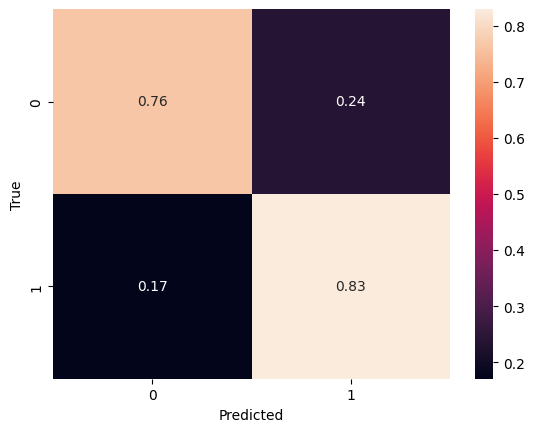

In [24]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 2], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [25]:
# now visitor
beh_names[10]

'Sniffing_V'

In [26]:
y_pred = model.predict(X_V)

accuracy_score(y[:, 10], y_pred)

0.7591715018840011

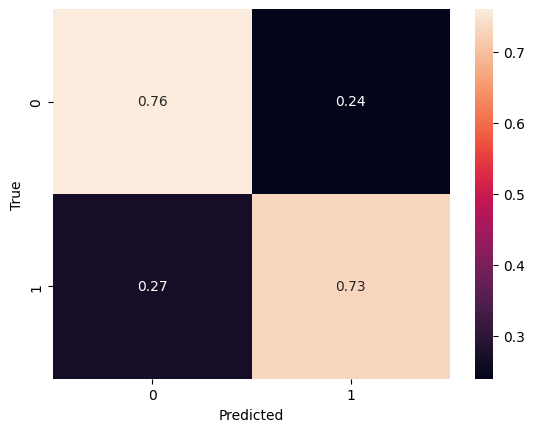

In [27]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 10], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

In [28]:
beh_names[3]

'Sniffing_head_R'

In [29]:
# Load the model
model = joblib.load('baseline_models/new_dataset/model_Shead.pkl')
print(model)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)


In [30]:
# Test the model
y_pred = model.predict(X_R)

accuracy_score(y[:, 3], y_pred)

0.8114727571141266

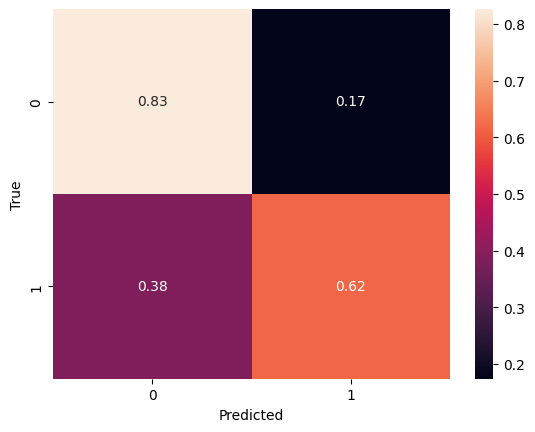

In [36]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 3], y_pred)

conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [31]:
beh_names[11]

'Sniffing_head_V'

In [32]:
y_pred = model.predict(X_V)

accuracy_score(y[:, 11], y_pred)

0.7273977669386718

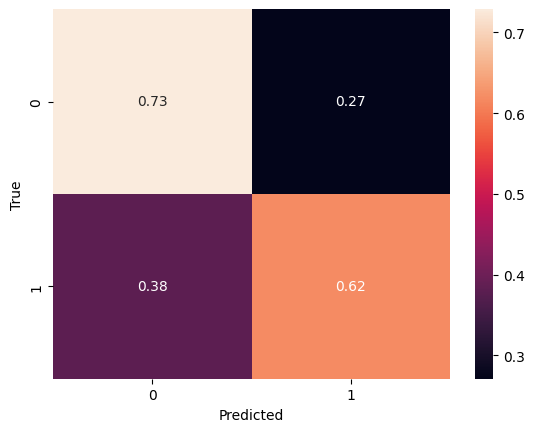

In [33]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 11], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

In [34]:
beh_names[4]

'Sniffing_body_R'

In [36]:
# Load the model
model = joblib.load('baseline_models/new_dataset/model_Sbody.pkl')
print(model)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)


In [37]:
# Test the model
y_pred = model.predict(X_R)

accuracy_score(y[:, 4], y_pred)


0.627984927991863

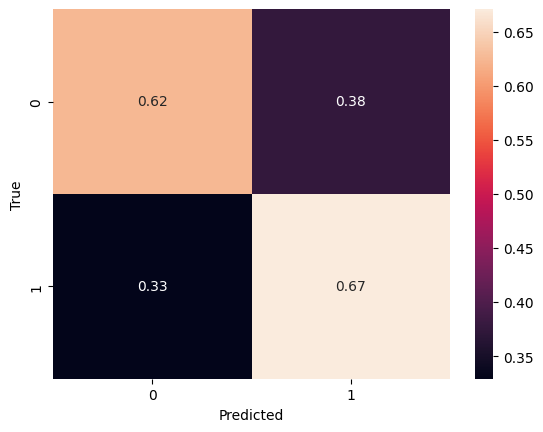

In [38]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 4], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [39]:
# now visitor
beh_names[12]

'Sniffing_body_V'

In [40]:
y_pred = model.predict(X_V)

accuracy_score(y[:, 12], y_pred)

0.802006518874685

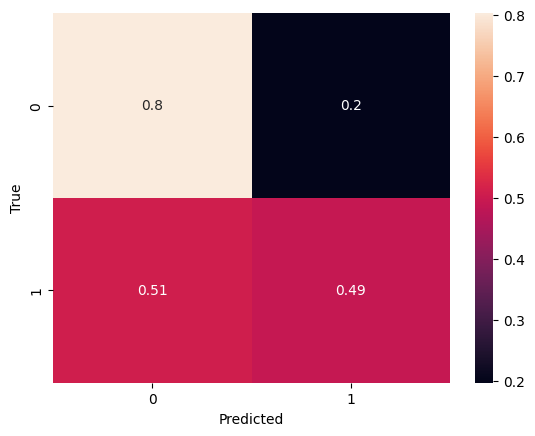

In [41]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 12], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

In [42]:
beh_names[5]

'Sniffing_anogenital_R'

In [44]:
model = joblib.load('baseline_models/new_dataset/model_Sanus.pkl')
print(model)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=372,
              verbose=True)


In [45]:
y_pred = model.predict(X_R)

accuracy_score(y[:, 5], y_pred)

0.7555306410226773

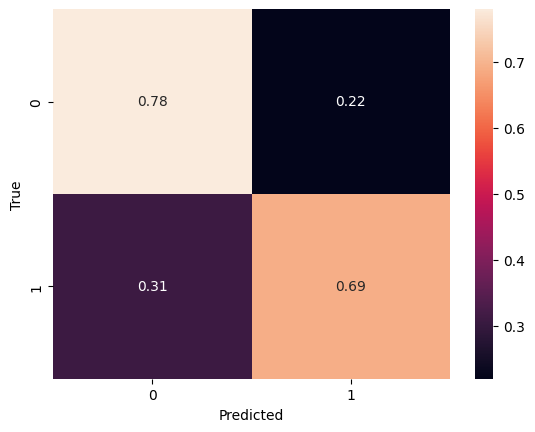

In [46]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 5], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [47]:
beh_names[13]

'Sniffing_anogenital_V'

In [49]:
y_pred = model.predict(X_V)

accuracy_score(y[:, 13], y_pred)


0.9220277861254306

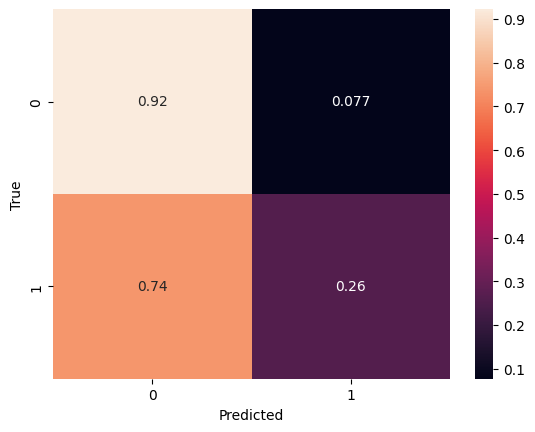

In [50]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 13], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

In [47]:
beh_names[6]

'Following_R'

In [48]:
# Load the model
model = joblib.load('baseline_models/new_dataset/model_poursuitR.pkl')
print(model)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)


In [49]:
# Test the model
y_pred = model.predict(X_R)

accuracy_score(y[:, 6], y_pred)


0.8569546221595506

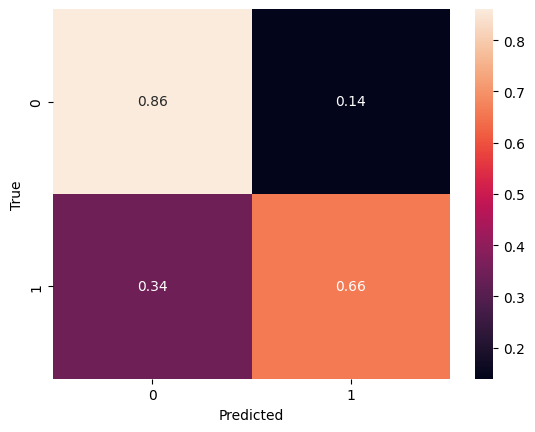

In [50]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 6], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [51]:
# now visitor
beh_names[16]


'Following_V'

In [52]:
y_pred = model.predict(X_V)

accuracy_score(y[:, 16], y_pred)

0.992706719988904

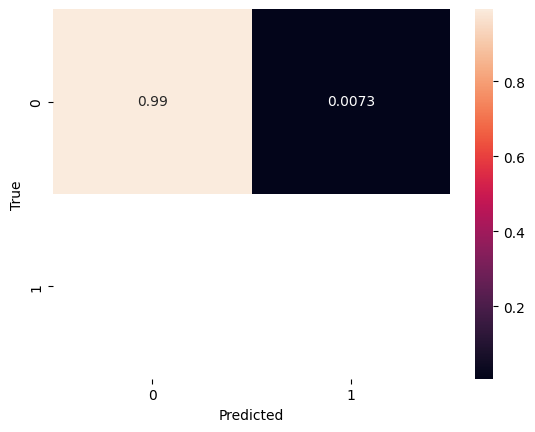

In [53]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 16], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

In [54]:
beh_names[7]

'Dominance_R'

In [55]:
# Load the model
model = joblib.load('baseline_models/new_dataset/model_domR.pkl')
print(model)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)


0.7650199958390161


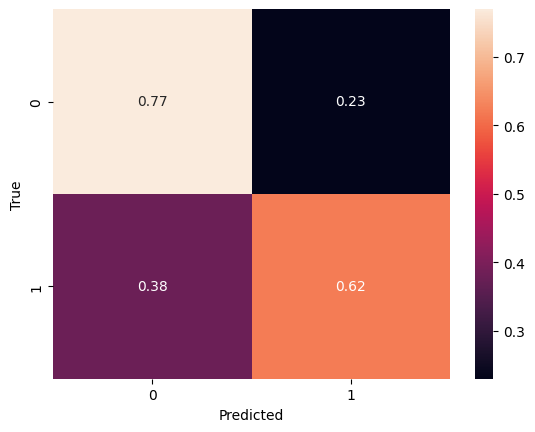

In [56]:
# Test the model
y_pred = model.predict(X_R)

print(accuracy_score(y[:, 7], y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y[:, 7], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [79]:
# now visitor
beh_names[15]

'Grooming_V'

0.8474537090547631


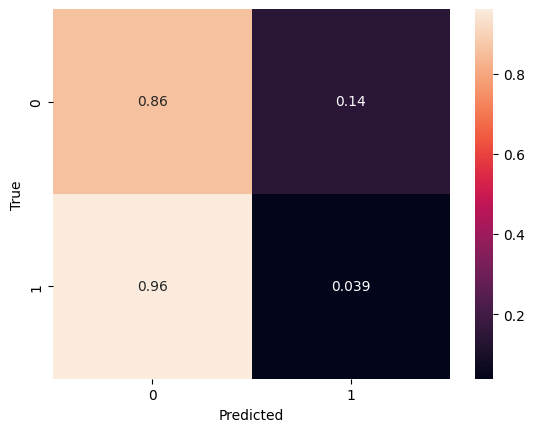

In [80]:
# Test the model
y_pred = model.predict(X_V)

print(accuracy_score(y[:, 15], y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y[:, 17], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

In [59]:
beh_names[8]

'Rearing_R'

In [60]:
model = joblib.load('baseline_models/new_dataset/model_rearingR.pkl')
print(model)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)


In [61]:
y_pred = model.predict(X)

accuracy_score(y[:, 8], y_pred)


NameError: name 'X' is not defined

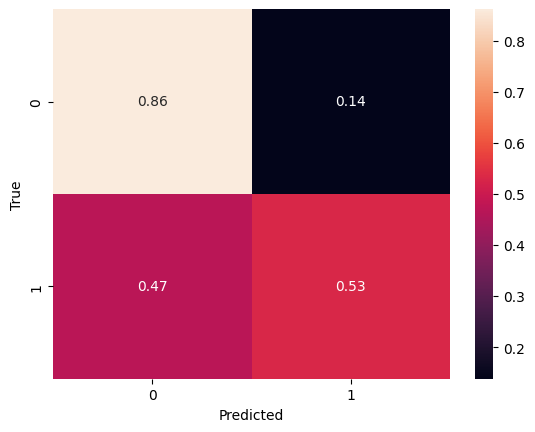

In [46]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 8], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

In [62]:
beh_names[9]

'Grooming_R'

In [63]:
model = joblib.load('baseline_models/new_dataset/model_groomR.pkl')

In [64]:
y_pred = model.predict(X_R)

accuracy_score(y[:, 9], y_pred)

0.9230680320858088

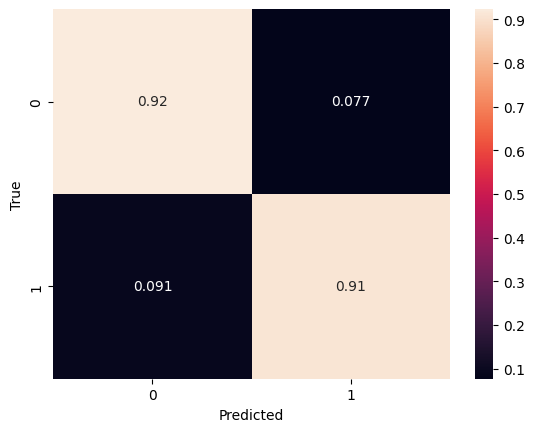

In [65]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 9], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [77]:
beh_names[]

IndexError: index 18 is out of bounds for axis 0 with size 18

In [73]:
y_pred = model.predict(X_V)

accuracy_score(y[:, 17], y_pred)

0.852365981645438

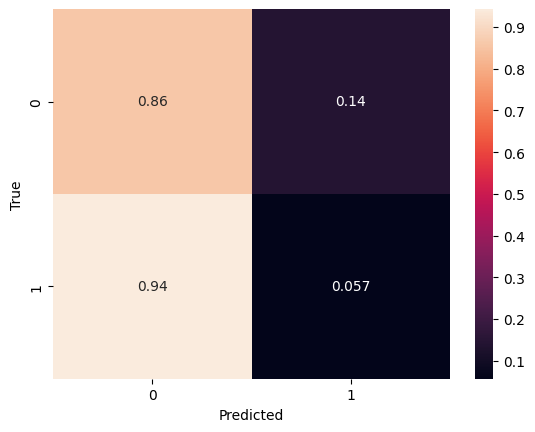

In [74]:
# Confusion matrix
conf_matrix = confusion_matrix(y[:, 15], y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Analysing the results

In [2]:
import os

In [5]:
outputs_csv = r'c:\Users\jalvarez\Documents\Data\DataSet_MDX52_INES\outputs'

output_files = os.listdir(outputs_csv)
# order the files
output_files.sort()

output_files


['Test_10_output.csv',
 'Test_11_output.csv',
 'Test_12_output.csv',
 'Test_13_output.csv',
 'Test_14_output.csv',
 'Test_15_output.csv',
 'Test_16_output.csv',
 'Test_1_output.csv',
 'Test_2_output.csv',
 'Test_3_output.csv',
 'Test_4_output.csv',
 'Test_5_output.csv',
 'Test_6_output.csv',
 'Test_7_output.csv',
 'Test_8_output.csv',
 'Test_9_output.csv']

In [6]:
gt_csv = r'c:\Users\jalvarez\Documents\Data\DataSet_MDX52_INES\GT'

gt_files = os.listdir(gt_csv)
# order the files
gt_files.sort()

gt_files

['Test_1.csv',
 'Test_10.csv',
 'Test_11.csv',
 'Test_12.csv',
 'Test_13.csv',
 'Test_14.csv',
 'Test_15.csv',
 'Test_16.csv',
 'Test_2.csv',
 'Test_3.csv',
 'Test_4.csv',
 'Test_5.csv',
 'Test_6.csv',
 'Test_7.csv',
 'Test_8.csv',
 'Test_9.csv']